In [2]:

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [3]:
df = pd.read_csv(r"C:\Users\Shan Jacob\Downloads\ACME-HappinessSurvey2020.csv")

In [4]:
df.shape

(126, 7)

In [5]:
df.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [7]:
df.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [8]:
# Rename our columns
df = df.rename(columns={'Y':'Happiness', 'X1':'Delivered_on_time', 'X2':'Expected_content',
                        'X3':'Everything_ordered', 'X4':'Good_price', 'X5':'Satisfication', 'X6':'Easy'})

In [9]:
df.describe()

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
df.head()

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [26]:
mean = df['Satisfication'].mean()
mode = df['Satisfication'].mode()[0]  # Pandas' mode can return multiple modes, [0] selects the first one
std = df['Satisfication'].std()
variance = df['Satisfication'].var()
median = df['Satisfication'].median()

print('mean:',mean)
print('mode:',mode)
print('std:',std)
print('variance:',variance)
print('median:',median)


mean: 3.6507936507936507
mode: 4
std: 1.1476407822482455
variance: 1.3170793650793648
median: 4.0


In [27]:
df.isna().sum()

Happiness             0
Delivered_on_time     0
Expected_content      0
Everything_ordered    0
Good_price            0
Satisfication         0
Easy                  0
dtype: int64

In [28]:
df.loc[df.duplicated()]

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy
4,0,5,4,3,3,3,5
22,0,4,3,5,5,5,4
28,1,3,3,1,3,3,4
33,1,3,2,4,4,4,5
37,1,5,3,4,3,4,5
50,1,5,1,3,3,4,4
51,1,5,1,3,3,4,4
53,1,5,2,4,3,4,5
55,1,4,3,2,4,3,4
62,1,5,2,4,4,5,5


In [29]:
df.loc[df.duplicated(subset=['Satisfication'])].head(5)

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


[]

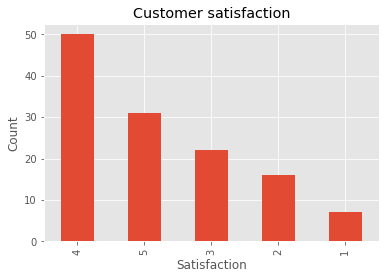

In [31]:
ax = df['Satisfication'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Customer satisfaction')
ax.set_xlabel('Satisfaction')
ax.set_ylabel('Count')
plt.plot()

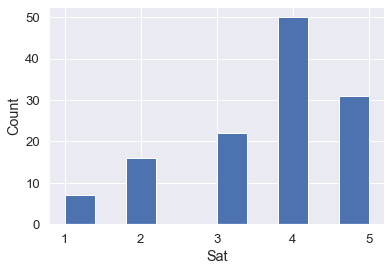

In [88]:
plt.hist(df['Satisfication'])
plt.xlabel('Sat')
plt.ylabel('Count')
plt.show()

In [90]:
upper_limit = df['Satisfication'].mean() + 3*df['Satisfication'].std()
upper_limit

7.093715997538387

In [91]:
lower_limit = df['Satisfication'].mean() -3*df['Satisfication'].std()
lower_limit

0.2078713040489144

In [93]:
df[(df['Satisfication']>upper_limit) | (df['Satisfication']<lower_limit)]

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy,Happiness_predicted


Text(0, 0.5, 'Count')

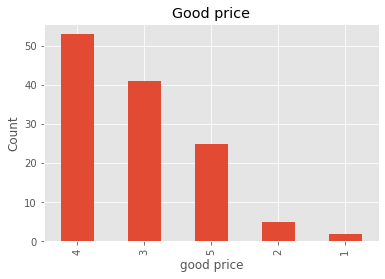

In [36]:
ax = df['Good_price'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Good price')
ax.set_xlabel('good price')
ax.set_ylabel('Count')

In [34]:
df.head(26)

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


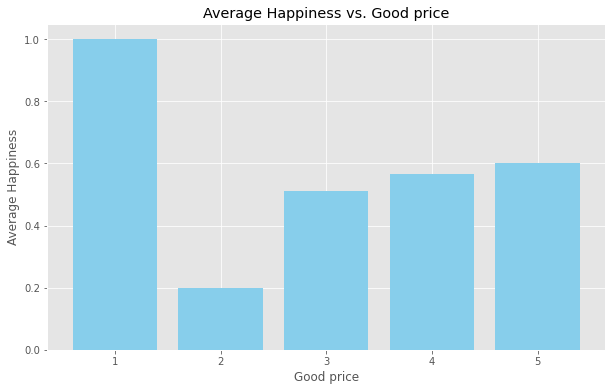

In [33]:
average_h_by_gp = df.groupby('Good_price')['Happiness'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(average_h_by_gp.index, average_h_by_gp.values, color='skyblue')
plt.xlabel('Good price')
plt.ylabel('Average Happiness')
plt.title('Average Happiness vs. Good price')
plt.xticks(average_h_by_gp.index)
plt.show()

In [35]:
df.query('Good_price == 1')

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy
34,1,4,1,3,1,1,4
119,1,5,5,1,1,5,1


In [37]:
variance = np.var(df)
print(variance)

Happiness             0.247732
Delivered_on_time     0.634921
Expected_content      1.233119
Everything_ordered    1.039116
Good_price            0.760897
Satisfication         1.306626
Easy                  0.649786
dtype: float64


In [38]:
std_dev = np.std(df)
print(std_dev)

Happiness             0.497727
Delivered_on_time     0.796819
Expected_content      1.110459
Everything_ordered    1.019370
Good_price            0.872294
Satisfication         1.143078
Easy                  0.806093
dtype: float64


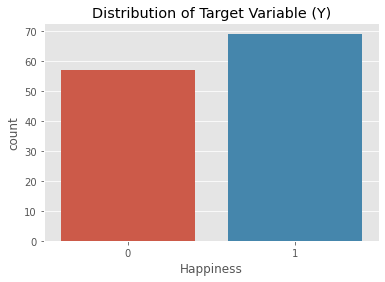

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Happiness', data=df)
plt.title("Distribution of Target Variable (Y)")
plt.show()

In [41]:
df.head()

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


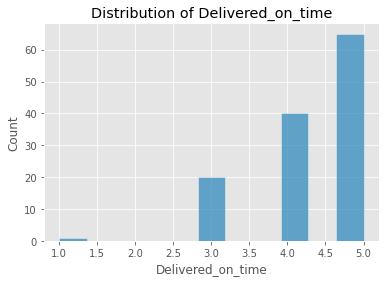

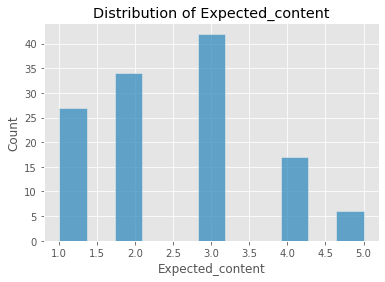

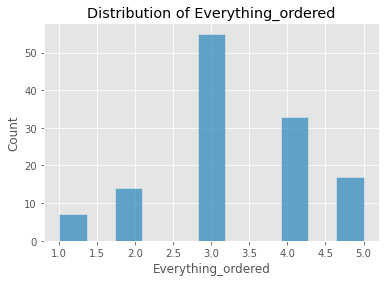

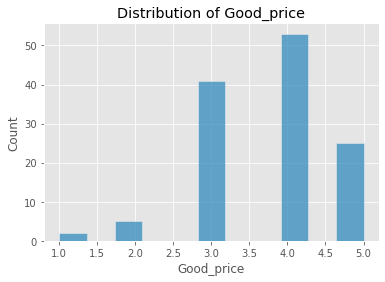

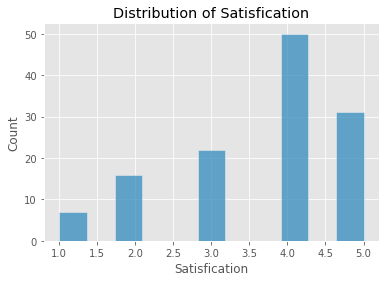

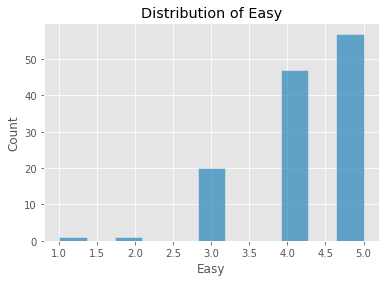

In [43]:
selected_columns = ['Delivered_on_time', 'Expected_content', 'Everything_ordered', 'Good_price', 'Satisfication', 'Easy']
for col in selected_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

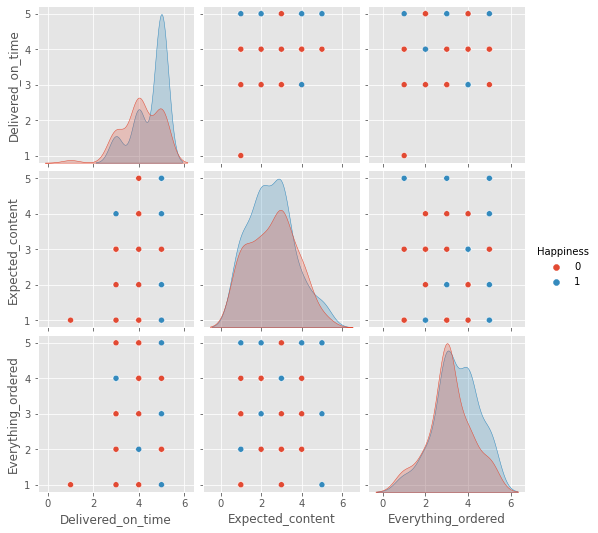

In [47]:
sns.pairplot(df,
             vars=['Delivered_on_time', 'Expected_content', 'Everything_ordered'],
            hue='Happiness')
plt.show()

[]

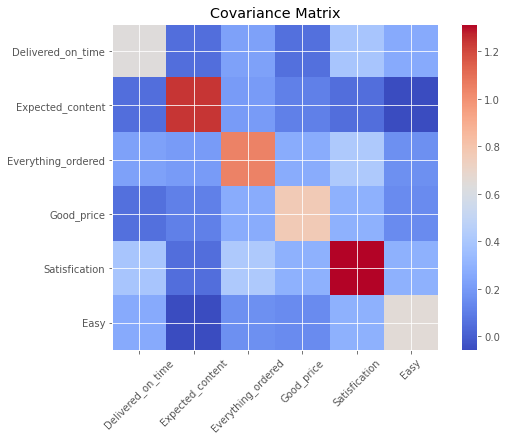

In [49]:


# Calculate the covariance matrix
covariance_matrix = np.cov(df[selected_columns], rowvar=False)

# Create a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(covariance_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Add title and labels
plt.title("Covariance Matrix")
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45)
plt.yticks(range(len(selected_columns)), selected_columns)

# Show the plot

plt.plot()

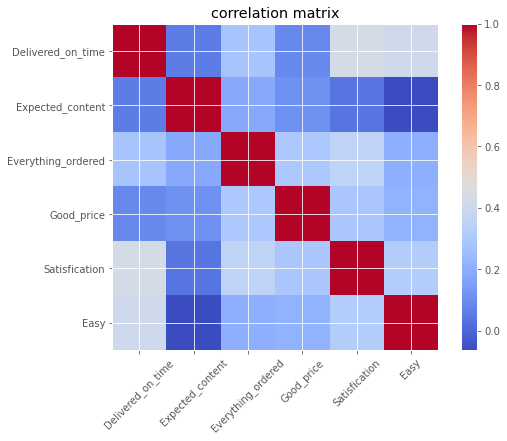

In [50]:
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Add a title and labels
plt.title("correlation matrix")
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45)
plt.yticks(range(len(selected_columns)), selected_columns)

# Show the plot
plt.show()

In [51]:
X = df[selected_columns]
Y = df['Happiness']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
# Initialize the XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
y_pred =model.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6538461538461539


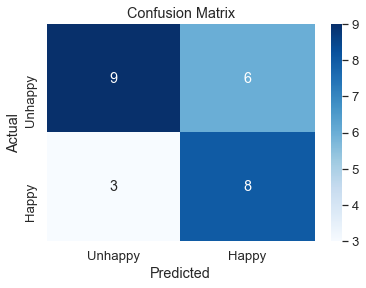

In [56]:


from sklearn.metrics import confusion_matrix


# Assuming y_pred and y_test are defined
conf_mat = confusion_matrix(y_test, y_pred)

# Create a figure and a set of subplots
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unhappy', 'Happy'],
            yticklabels=['Unhappy', 'Happy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

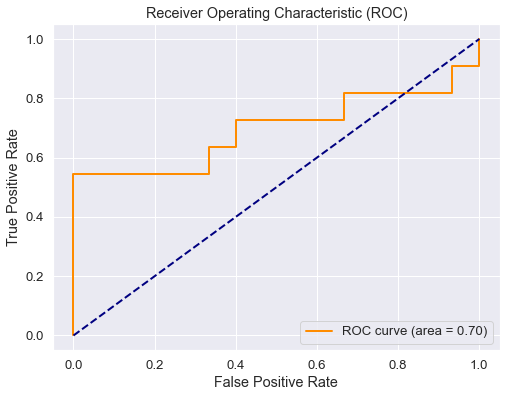

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_probabilities = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [65]:
yp=y_pred.tolist()

In [68]:
df2['Happiness_predicted'] = yp

<ipython-input-68-78eb514496a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Happiness_predicted'] = yp


In [67]:
df2=df.head(26)

In [69]:
df2.head(5)

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy,Happiness_predicted
0,0,3,3,3,4,2,4,1
1,0,3,2,3,5,4,3,1
2,1,5,3,3,3,3,5,0
3,0,5,4,3,3,3,5,0
4,0,5,4,3,3,3,5,0


In [74]:
print(y_test)

73     0
19     0
116    1
67     0
94     0
77     1
31     0
53     1
117    1
44     1
4      0
104    0
36     1
97     1
78     0
18     0
91     1
10     0
55     1
11     0
45     1
26     1
76     0
0      0
56     0
40     0
Name: Happiness, dtype: int64


In [86]:
yp_10=y_pred[:10]
yt_10=y_test[:10]
print(yt_10,yp_10)

73     0
19     0
116    1
67     0
94     0
77     1
31     0
53     1
117    1
44     1
Name: Y, dtype: int64 [1 1 0 0 0 1 0 1 1 0]


In [101]:
df2.head(26)

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy,Happiness_predicted
0,0,3,3,3,4,2,4,1
1,0,3,2,3,5,4,3,1
2,1,5,3,3,3,3,5,0
3,0,5,4,3,3,3,5,0
4,0,5,4,3,3,3,5,0
5,1,5,5,3,5,5,5,1
6,0,3,1,2,2,1,3,0
7,1,5,4,4,4,4,5,1
8,0,4,1,4,4,4,4,1
9,0,4,4,4,2,5,5,0


In [75]:
feature_importance = model.feature_importances_

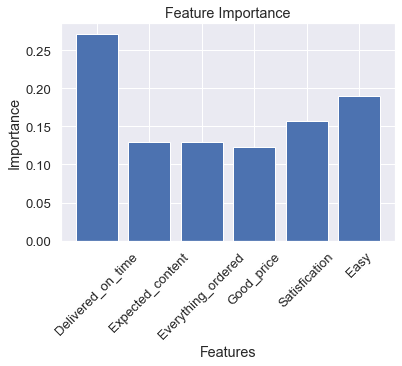

In [77]:
plt.bar(selected_columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [94]:
from sklearn.metrics import classification_report


# Calculate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.57      0.73      0.64        11

    accuracy                           0.65        26
   macro avg       0.66      0.66      0.65        26
weighted avg       0.67      0.65      0.66        26



In [95]:
tp = conf_mat[1, 1]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]
tn = conf_mat[0, 0]

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall (or sensitivity)
recall = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

In [97]:
print(f'Precision: {precision}')
print(f'Recall : {recall}')
print(f'Specificity: {specificity}')

Precision: 0.5714285714285714
Recall : 0.7272727272727273
Specificity: 0.6


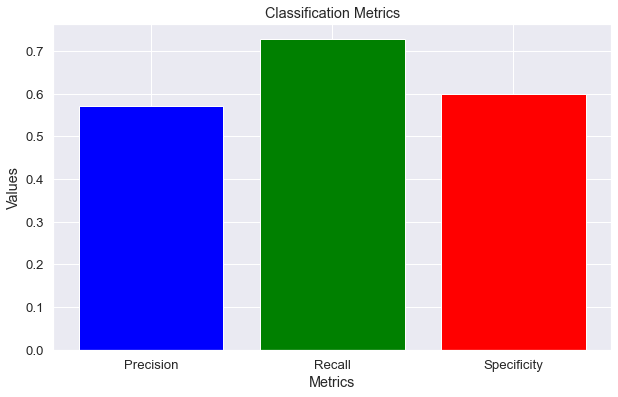

In [98]:
labels = ['Precision', 'Recall', 'Specificity']
values = [precision, recall, specificity]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Classification Metrics')

# Show the plot
plt.show()

In [118]:
average_h_by_gp = df2.groupby('Good_price')['Happiness'].mean()
average_hp_by_gp = df2.groupby('Good_price')['Happiness_predicted'].mean()

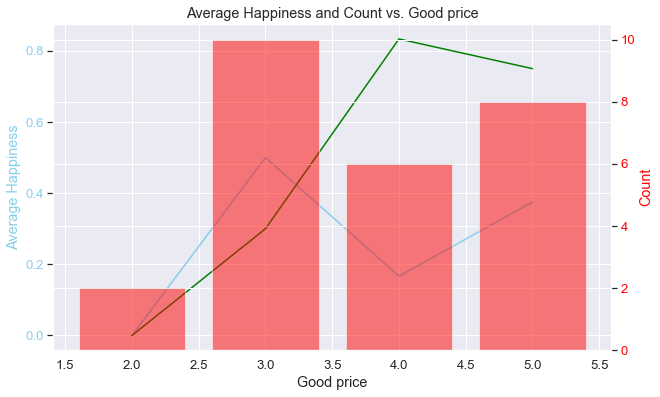

In [120]:




# Calculate the count of each category
count_by_gp = df2['Good_price'].value_counts()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average happiness
color = 'skyblue'
ax1.set_xlabel('Good price')
ax1.set_ylabel('Average Happiness', color=color)
ax1.plot(average_h_by_gp.index, average_h_by_gp.values, color=color)
ax1.plot(average_hp_by_gp.index, average_hp_by_gp.values, color='green')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for the count
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Count', color=color)
ax2.bar(count_by_gp.index, count_by_gp.values, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

# Set the title
plt.title('Average Happiness and Count vs. Good price')

# Show the plot
plt.show()


In [122]:
average_h_by_s = df2.groupby('Satisfication')['Happiness'].mean()
average_hp_by_s = df2.groupby('Satisfication')['Happiness_predicted'].mean()

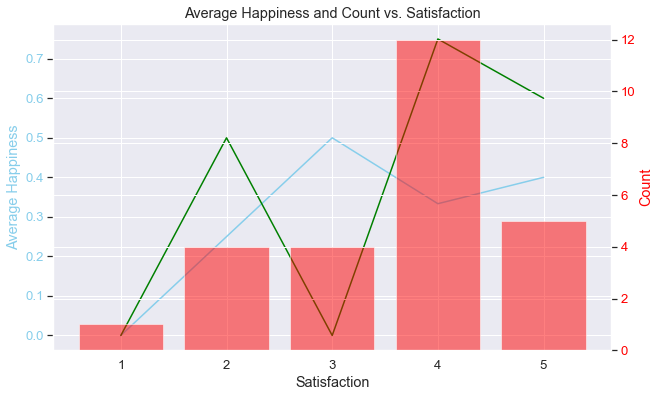

In [124]:
# Assuming df2 is your DataFrame

# Calculate the count of each category
count_by_gp = df2['Satisfication'].value_counts()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average happiness
color = 'skyblue'
ax1.set_xlabel('Satisfaction')
ax1.set_ylabel('Average Happiness', color=color)
ax1.plot(average_h_by_s.index, average_h_by_s.values, color=color)
ax1.plot(average_hp_by_s.index, average_hp_by_s.values, color='green')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for the count
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Count', color=color)
ax2.bar(count_by_gp.index, count_by_gp.values, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

# Set the title
plt.title('Average Happiness and Count vs. Satisfaction')

# Show the plot
plt.show()

In [116]:
df2.head(26)

,Happiness,Delivered_on_time,Expected_content,Everything_ordered,Good_price,Satisfication,Easy,Happiness_predicted
0,0,3,3,3,4,2,4,1
1,0,3,2,3,5,4,3,1
2,1,5,3,3,3,3,5,0
3,0,5,4,3,3,3,5,0
4,0,5,4,3,3,3,5,0
5,1,5,5,3,5,5,5,1
6,0,3,1,2,2,1,3,0
7,1,5,4,4,4,4,5,1
8,0,4,1,4,4,4,4,1
9,0,4,4,4,2,5,5,0
